In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electric-power-consumption-data-set/household_power_consumption.txt


# Шаг 1. Подготовка данных

In [59]:
data = pd.read_table('/kaggle/input/electric-power-consumption-data-set/household_power_consumption.txt', sep = ';')
data.head()

/tmp/ipykernel_36/3855191428.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table('/kaggle/input/electric-power-consumption-data-set/household_power_consumption.txt', sep = ';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [60]:
len(data)

2075259

Тип object - надо переводить в числовой

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


Проверим на пропуски и дубли

In [62]:
data['Global_active_power'] = pd.to_numeric(data['Global_active_power'], errors='coerce')
data['Sub_metering_3'] = pd.to_numeric(data['Sub_metering_3'], errors='coerce')
data['Sub_metering_2'] = pd.to_numeric(data['Sub_metering_2'], errors='coerce')
data['Sub_metering_1'] = pd.to_numeric(data['Sub_metering_1'], errors='coerce')
data['Voltage'] = pd.to_numeric(data['Voltage'], errors='coerce')
data['Global_reactive_power'] = pd.to_numeric(data['Voltage'], errors='coerce')
data['Global_intensity'] = pd.to_numeric(data['Global_intensity'], errors = 'coerce')

In [63]:
data.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [64]:
data.duplicated().sum()

0

In [65]:
data['Sub_metering_3'].fillna(data['Sub_metering_3'].mean(), inplace=True)


data.isnull().sum()

/tmp/ipykernel_36/2660606671.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Sub_metering_3'].fillna(data['Sub_metering_3'].mean(), inplace=True)


Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3               0
dtype: int64

In [ ]:
for col in data.columns:
    data[col].fillna(data[col].mean(), inplace=True)

In [ ]:
data.isnull().sum()

In [55]:
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H:%M:%S')

In [56]:
data.drop('Date', axis=1, inplace=True)
data.drop('Time', axis=1, inplace=True)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   Datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [58]:
data.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3               0
Datetime                     0
dtype: int64

In [39]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,234.84,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,233.63,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,233.29,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,233.74,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,235.68,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


# Шаг 2 EDA

Исследовательский анализ данных (EDA)
- Построить графики временного ряда, чтобы визуально оценить тренды и сезонные колебания.
- Построить графики автокорреляции и частичной автокорреляции для оценки зависимости между предыдущими значениями.
- Посмотреть распределение потребления электроэнергии в зависимости от времени суток, дня недели, месяца.

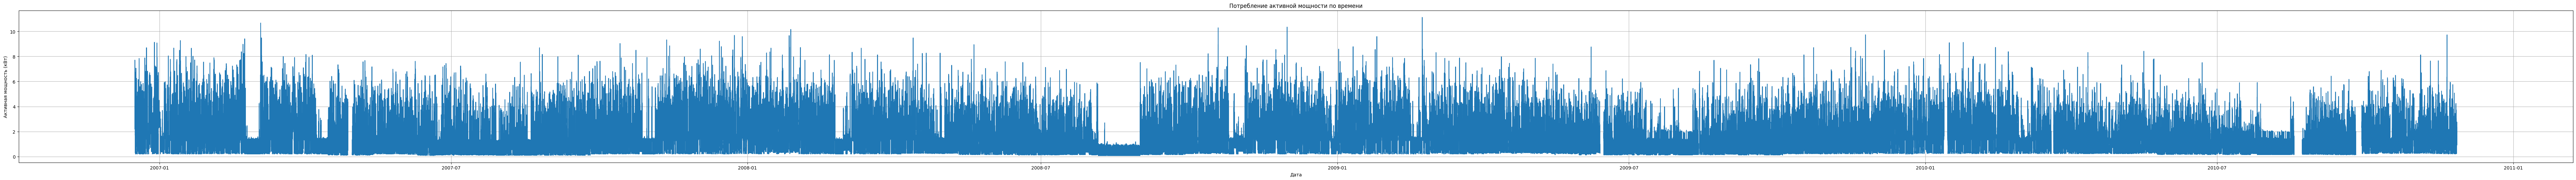

In [16]:
import matplotlib.pyplot as plt

# График временного ряда
plt.figure(figsize=(100, 6))
plt.plot(data['Datetime'], data['Global_active_power'])
plt.title('Потребление активной мощности по времени')
plt.xlabel('Дата')
plt.ylabel('Активная мощность (кВт)')
plt.grid(True)
plt.show()


In [17]:
data_index = data
data_index.set_index('Datetime', inplace=True)

In [18]:
daily_data = data_index['Global_active_power'].resample('D').mean()
daily_data

Datetime
2006-12-16    3.053475
2006-12-17    2.354486
2006-12-18    1.530435
2006-12-19    1.157079
2006-12-20    1.545658
                ...   
2010-11-22    1.417733
2010-11-23    1.095511
2010-11-24    1.247394
2010-11-25    0.993864
2010-11-26    1.178230
Freq: D, Name: Global_active_power, Length: 1442, dtype: float64

In [19]:
type(daily_data)

pandas.core.series.Series

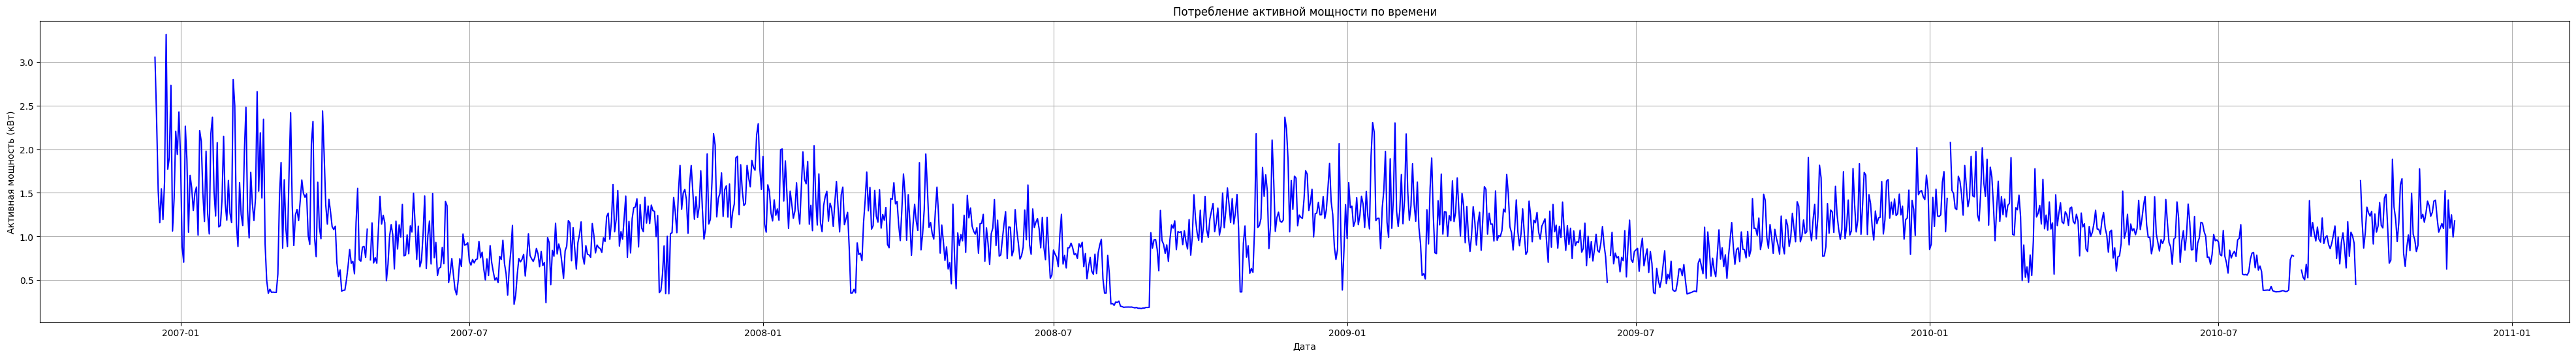

In [20]:
# График временного ряда
plt.figure(figsize=(50, 6))
plt.plot(daily_data.index, daily_data.values, label='Daily', color='blue')
plt.title('Потребление активной мощности по времени')
plt.xlabel('Дата')
plt.ylabel('Активная мощность (кВт)')
plt.grid(True)
plt.show()

In [21]:
weekly_data = data_index['Global_active_power'].resample('W').mean()
weekly_data

Datetime
2006-12-17    2.505248
2006-12-24    1.734186
2006-12-31    1.958376
2007-01-07    1.484233
2007-01-14    1.604954
                ...   
2010-10-31    0.958963
2010-11-07    1.154565
2010-11-14    1.335928
2010-11-21    1.107106
2010-11-28    1.186756
Freq: W-SUN, Name: Global_active_power, Length: 207, dtype: float64

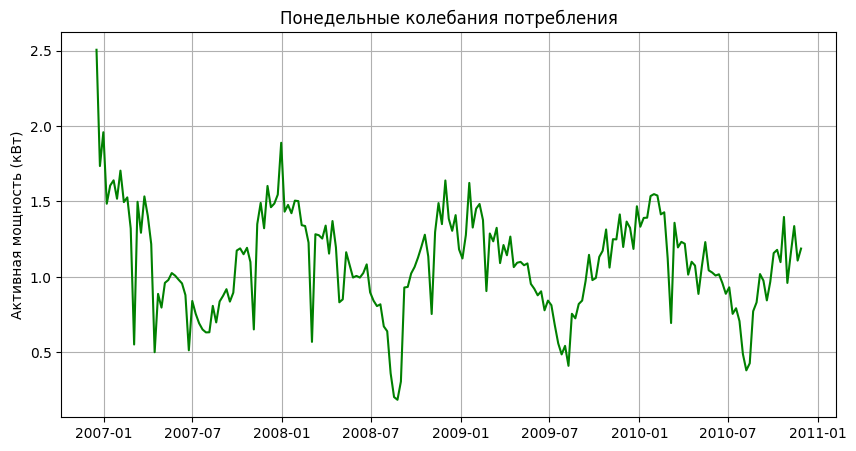

In [22]:
plt.figure(figsize=(10,5))
plt.plot(weekly_data.index, weekly_data.values, label='Weekly', color='green')
plt.title('Понедельные колебания потребления')
plt.ylabel('Активная мощность (кВт)')
plt.grid(True)

/tmp/ipykernel_36/2535862362.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data_index['Global_active_power'].resample('M').mean()


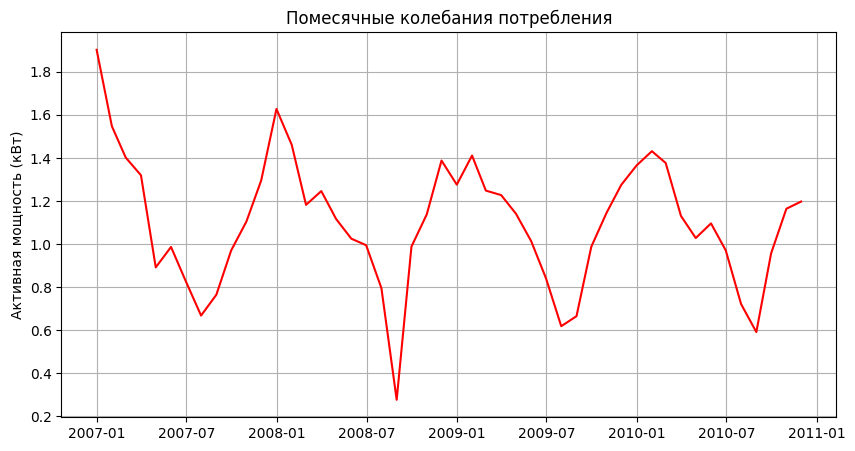

In [23]:
# Ежемесячные данные
monthly_data = data_index['Global_active_power'].resample('M').mean()
# Помесячные колебания
plt.figure(figsize=(10,5))
plt.plot(monthly_data.index, monthly_data.values, label='Monthly', color='red')
plt.title('Помесячные колебания потребления')
plt.ylabel('Активная мощность (кВт)')
plt.grid(True)

**Графики автокорреляции и частичной автокорреляции**

/opt/conda/lib/python3.10/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


<Figure size 1200x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

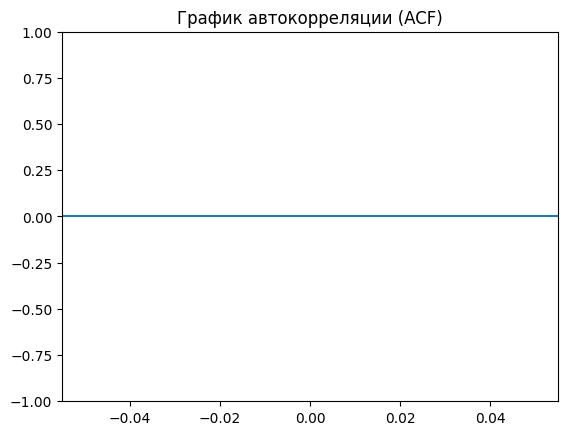

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
daily_data
# Построение ACF и PACF
plt.figure(figsize=(12, 6))

# График автокорреляции (ACF)
plt.figure(figsize=(10, 6))
plot_acf(daily_data, lags=10)  # lags=10 означает, что мы отображаем 10 предыдущих лагов
plt.title('График автокорреляции (ACF)')
plt.show()

**проверить данные на стационарность**

In [46]:
data.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3               0
Datetime                     0
dtype: int64

In [45]:
from statsmodels.tsa.stattools import adfuller

# Выполнение ADF-теста
result = adfuller(data['Global_intensity'])  # Замените 'Consumption' на ваш столбец

# Вывод результатов
print('ADF Statistic:', result[0])  # Статистика теста
print('p-value:', result[1])  # p-значение
print('Critical Values:', result[4])  # Критические значения на уровнях значимости 1%, 5%, 10%

# Интерпретация
if result[1] < 0.05:
    print("Временной ряд стационарен")
else:
    print("Временной ряд не стационарен")

MissingDataError: exog contains inf or nans

# Шаг 3 Модель регрессии для предсказания поведения электропотребления

**полиномиальная регрессия**

In [40]:
data.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Datetime'],
      dtype='object')

In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

X = data['Datetime']
y = data['Global_intensity']

poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

poly_model.fit(X, y)

y_pred = poly_model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred)

ValueError: Expected 2D array, got 1D array instead:
array=['2006-12-16T17:24:00.000000000' '2006-12-16T17:25:00.000000000'
 '2006-12-16T17:26:00.000000000' ... '2010-11-26T21:00:00.000000000'
 '2010-11-26T21:01:00.000000000' '2010-11-26T21:02:00.000000000'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.